# Geopandas: Explore Phase Tensor Ellipses and Tipper Shape Files


    *  How to concatenate multiple geopandas frames?
    *  How to chnage the geometry crs
    *  how to display on a basemap
    *  how to display on folium map


## http://geopandas.org/index.html
## https://geohackweek.github.io/vector/04-geopandas-intro/
## https://pythongisresources.wordpress.com/packages/


In [1]:
import os,sys
import glob

import numpy as np
import pandas as pd
import geopandas as gpd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

mpl.rcParams['figure.figsize']=[30,10]

# Reading and Wrting Shape files

In [6]:

SHAPE_DIR='/e/Data/MT_Datasets/GA_UA_edited_10s-10000s_SHP/'
#'/Softlab/Data/MT_datasets/75098/Phase_Tensor_Shapes'  # wrongly mapped to UTM zone
#r'/Softlab/Data/MT_datasets/728889/Phase_Tensor_Shapes'
SHAPE_DIR='E:/Data/MT_Datasets/WenPingJiang_SHP'

shapefile_list=glob.glob(SHAPE_DIR+'/*.shp')
#shapefile_list=glob.glob(SHAPE_DIR+'/T*.shp')
print ("Number of shape files found in %s: %s"% (SHAPE_DIR, len(shapefile_list)))
icount=0

Number of shape files found in E:/Data/MT_Datasets/WenPingJiang_SHP: 174


Processing the 6-th shape file: E:/Data/MT_Datasets/WenPingJiang_SHP\PT_0.00021548s_None.shp
(87, 8)


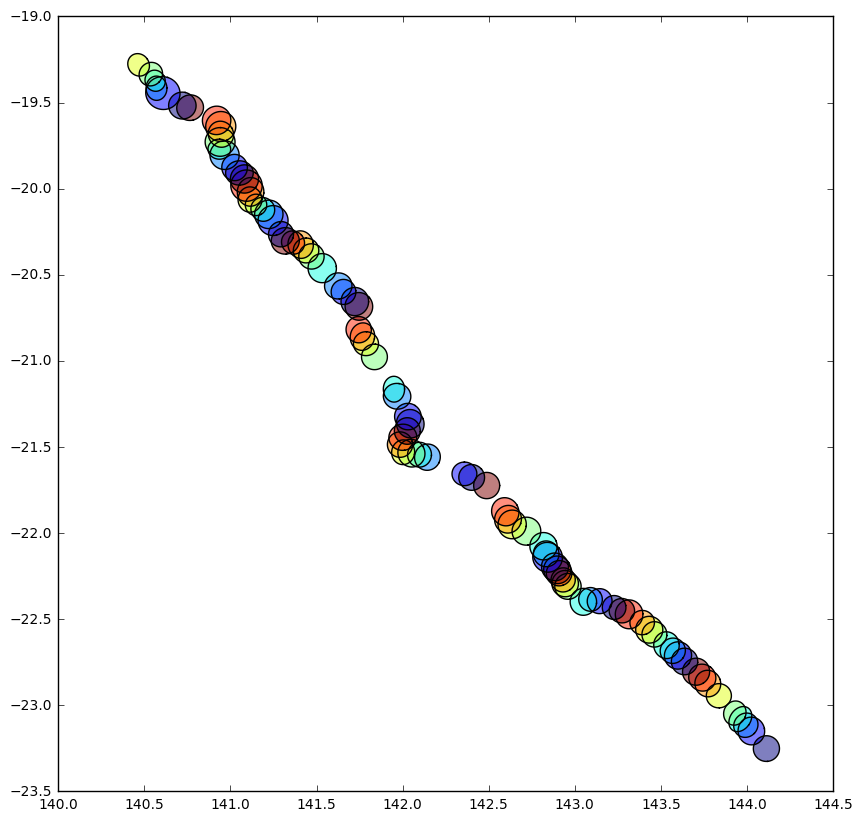

In [22]:

shpfile= shapefile_list[icount]
print ("Processing the %s-th shape file: %s"%(icount,shpfile))

shpf=gpd.GeoDataFrame.from_file(shpfile)

print (shpf.shape)  #head()

icount = icount+1

myax=shpf.plot()

#myax.set_xlim([149,150])  # chnage accordingly
# myax.set_xlim([140,150])  # for GA_UA  dataset
# myax.set_ylim([-39,-34])

In [23]:
shpf.head()

,Name,azimuth,ellipt,geometry,n_skew,phi_max,phi_min,skew
0,10030,84.865175,0.008528,"POLYGON ((144.118977 -23.325417, 144.11104 -23...",-0.070543,54.763280,53.837177,-0.035271
1,10060,-10.805301,0.022740,"POLYGON ((144.10061 -23.134617, 144.101776 -23...",-1.397180,58.213465,55.624805,-0.698590
2,10070,43.853465,0.031429,"POLYGON ((144.042196 -23.16268, 144.036661 -23...",0.465199,52.465090,49.267733,0.232599
3,10080,35.458727,0.141646,"POLYGON ((144.009293 -23.114261, 144.004246 -2...",-6.823988,56.909514,42.787774,-3.411994
4,10090,21.442514,0.051021,"POLYGON ((143.988607 -23.06835, 143.985565 -23...",-3.989259,51.271837,46.293936,-1.994630


(91, 8)


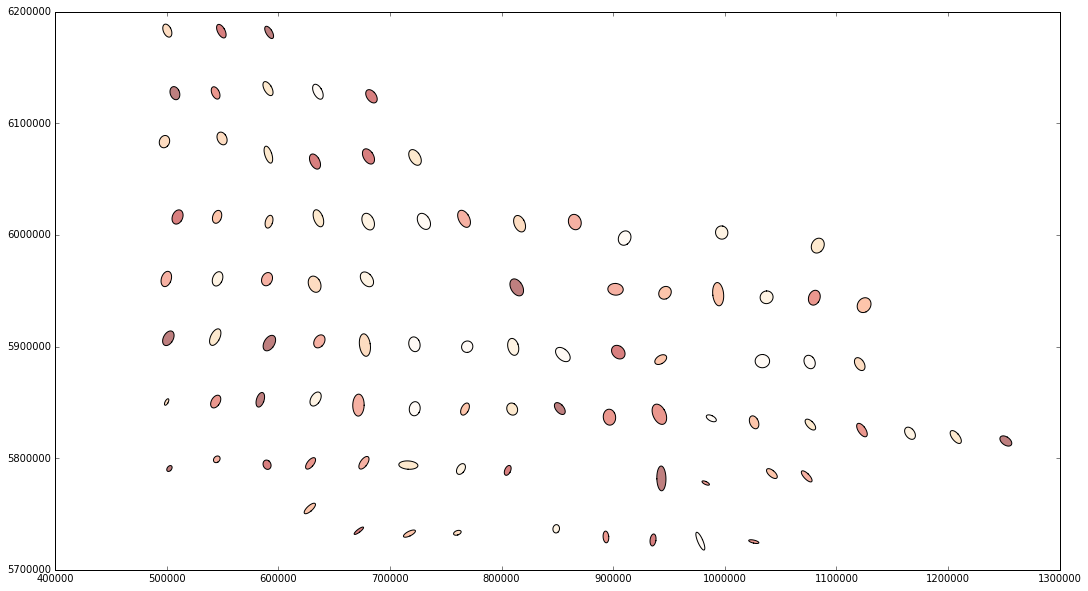

In [145]:


shpfile=r'/e/Data/MT_Datasets/ReProjected/pt_utm28354.shp'  # using QGIS


shpf=gpd.GeoDataFrame.from_file(shpfile)

#shpf['phi_max'].plot(marker='*', markersize=14)

shpf.plot(cmap='OrRd', scheme='quantiles');  #(marker='o', color='red', markersize=5)
print shpf.shape

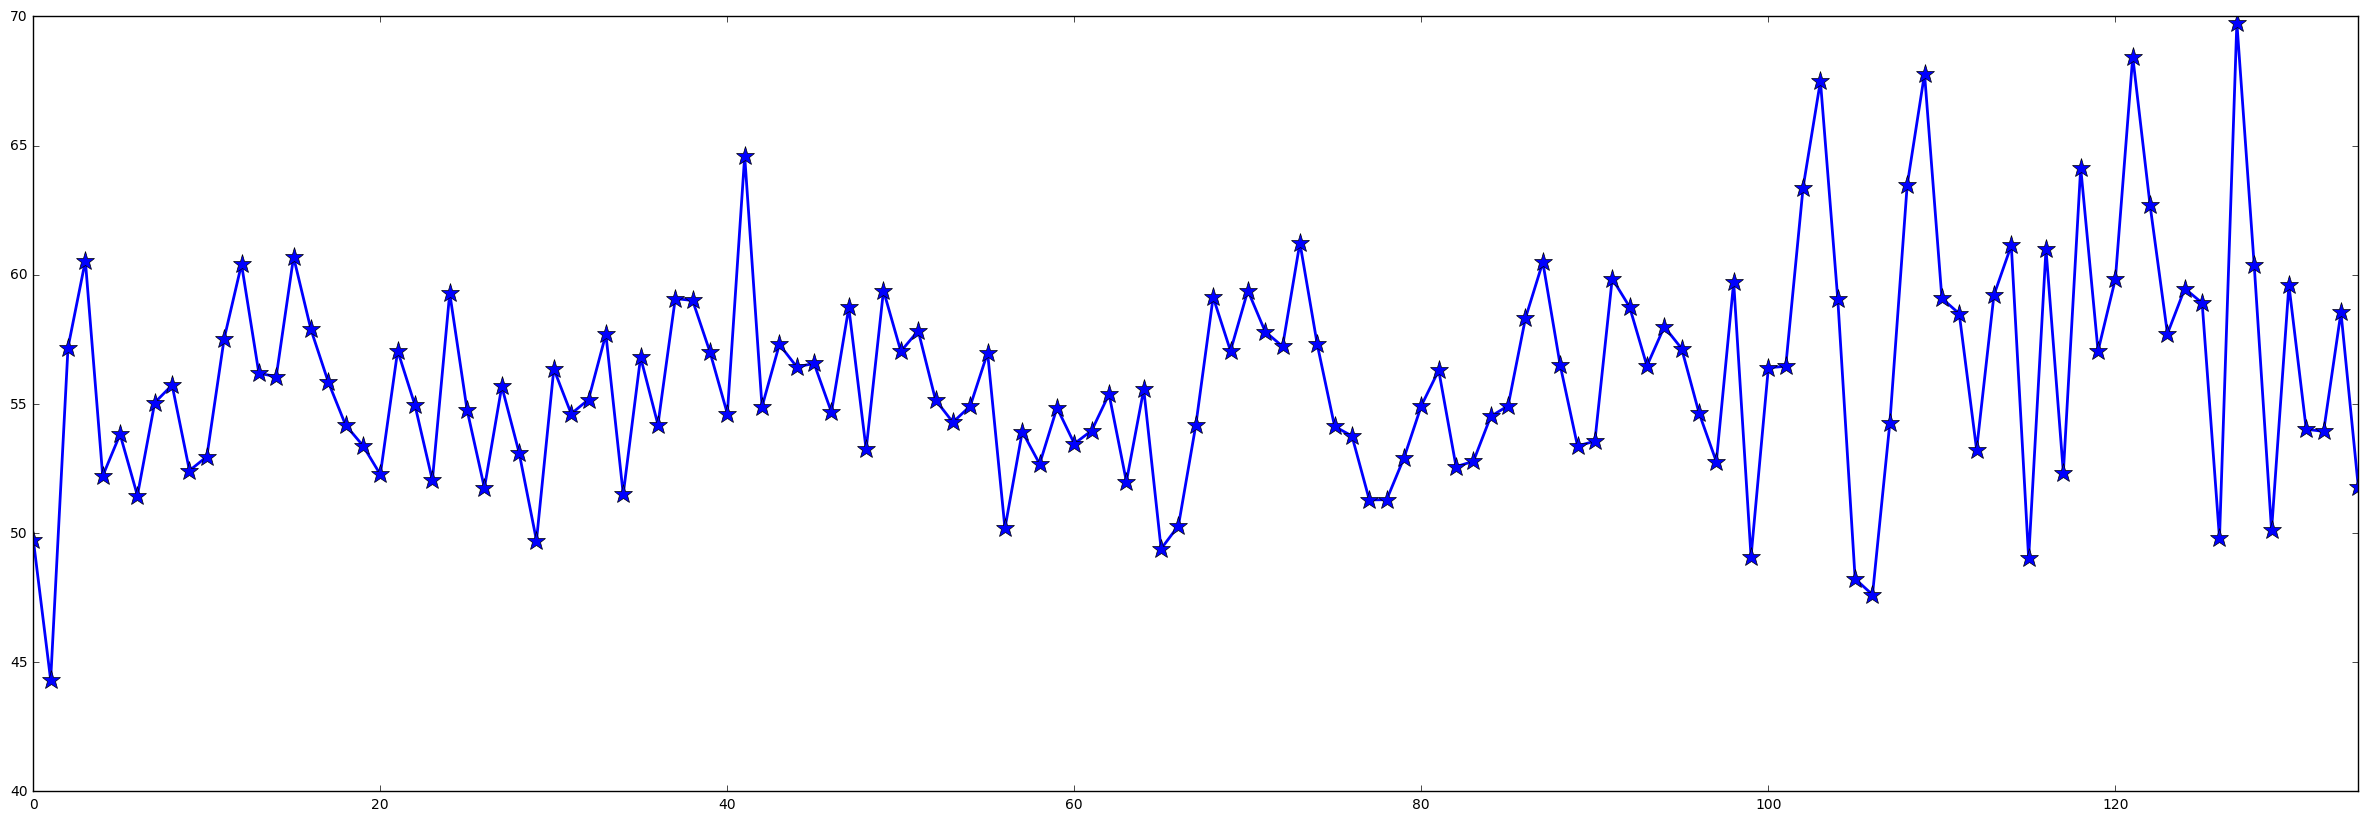

In [10]:
if 'mag_real' in shpf.columns.values:
    shpf['mag_real'].plot(marker='*', markersize=14)
    
if 'phi_max'  in shpf.columns.values:
    shpf['phi_max'].plot(marker='*', markersize=14)

# Re-Projecting

In [11]:
shpf.geometry.crs

{'init': u'epsg:4326'}

{'init': u'epsg:4326'}


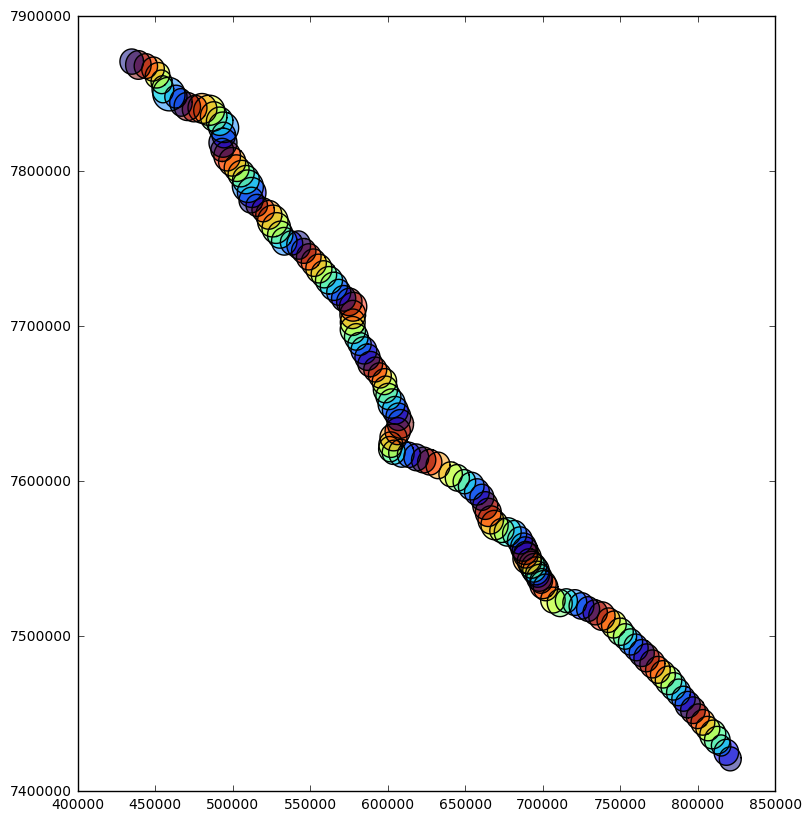

In [16]:
# WGS84 == 'epsg:4326'

# GDA94 == EPSG:4283 See  http://epsg.io/4283

#http://spatialreference.org/ref/epsg/4283/

print shpf.crs

#myshpf= shpf.to_crs({'init':'epsg:4283'}) 


#shpf.to_crs({'init':'epsg:4283'}).plot()

shpf.to_crs({'init':'epsg:32754'}).plot()


In [85]:
myshpf= shpf.to_crs({'init':'epsg:4283'}) 
myshpf.geometry.crs

{'init': 'epsg:4283'}

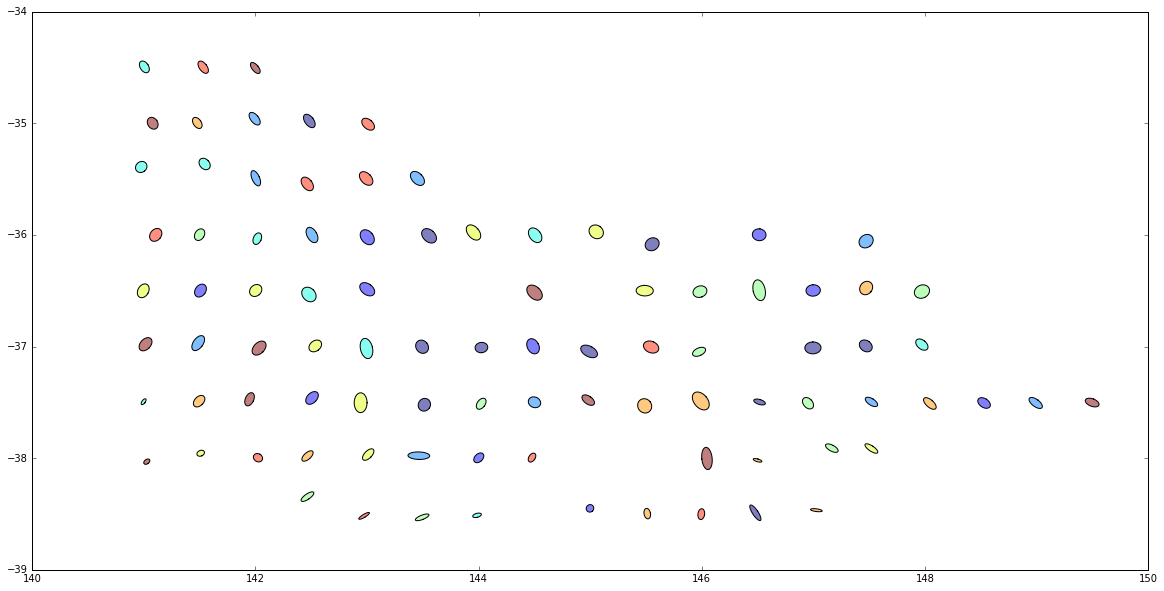

In [86]:
myshpf.plot()  
#myshpf.plot(marker='o', markersize=10)  no good!!

In [12]:
# Now, we create centroids and make it the geometry:

myshpf['centroid_column'] =myshpf.centroid

myshpf = myshpf.set_geometry('centroid_column')

myshpf.plot(marker='o', markersize='12');

NameError: name 'myshpf' is not defined

In [88]:
myshpf.iloc[-2:]

,Name,azimuth,ellipt,geometry,n_skew,phi_max,phi_min,skew,centroid_column
89,VIC042,-69.151295,0.315796,POLYGON ((149.5098960286354 -37.46980199895117...,9.942754,54.301897,28.236572,4.971377,POINT (149.4979000570667 -37.50130002112407)
90,VIC079,-47.406529,0.176531,POLYGON ((143.5919710000209 -35.96835800000081...,-7.467797,63.510073,44.451532,-3.733899,POINT (143.5560599705494 -36.00742030091552)


In [89]:
myshpf['geometry'][:10]

0    POLYGON ((146.9946980029039 -36.95838899989224...
1    POLYGON ((142.5385980000014 -37.49039300000192...
2    POLYGON ((142.0341140000002 -35.4777700000013,...
3    POLYGON ((141.576864 -35.33431500000126, 141.5...
4    POLYGON ((147.9975170080221 -36.55897999966719...
5    POLYGON ((143.0341590000056 -37.99018600000203...
6    POLYGON ((142.4866290000011 -38.00249200000213...
7    POLYGON ((142.9809800000049 -38.52843000000228...
8    POLYGON ((142.0212070000002 -34.48560500000105...
9    POLYGON ((146.5006320015972 -38.47531199995704...
Name: geometry, dtype: object

## Mapping onto World Basemap

In [17]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.shape

(177, 6)

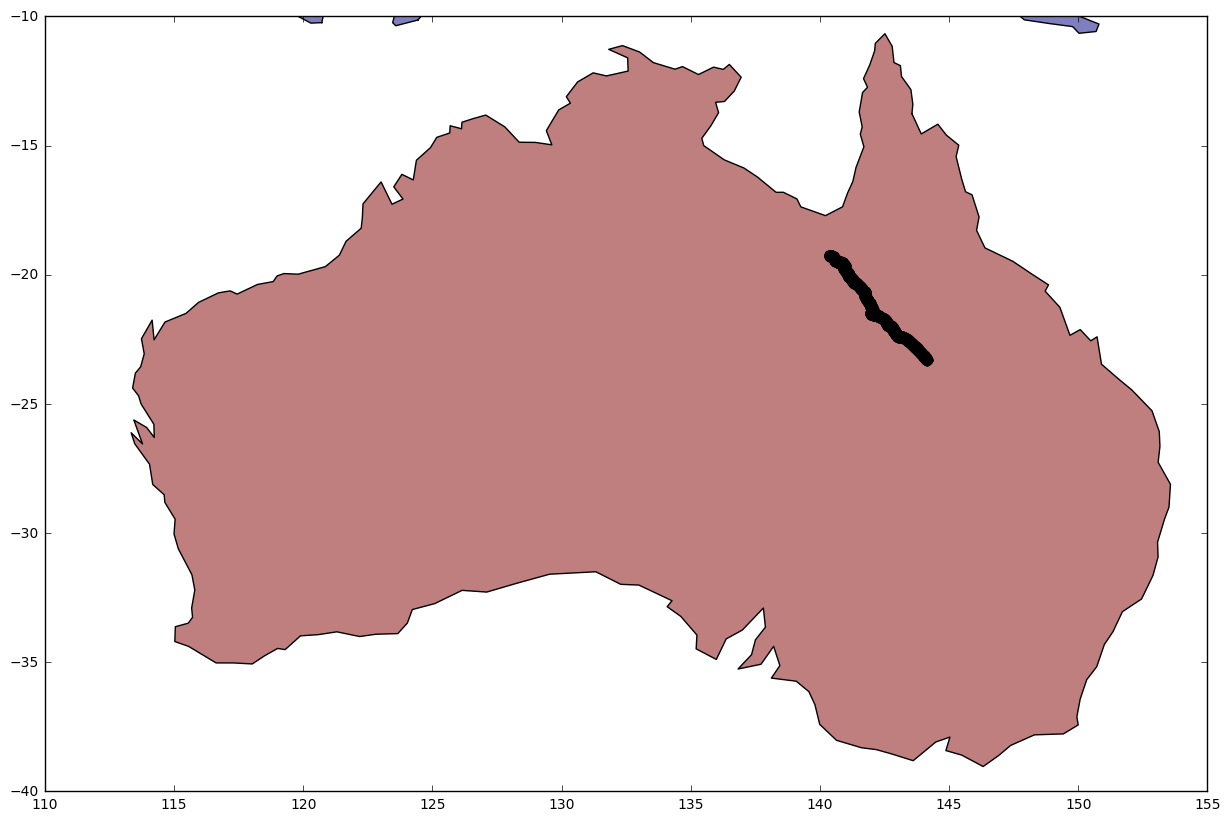

In [19]:


myax=world.plot(alpha=0.5)
#myax.set_xlim([149,150])
myax.set_xlim([110,155])
myax.set_ylim([-40,-10])
    
myax=shpf.plot(ax=myax, figsize=(10, 6),  marker='o', color='blue', markersize=5);

In [20]:
# what if the crs are different in layers.
world.crs

{'init': u'epsg:4326'}

# Load data from geojson files

(91, 8)


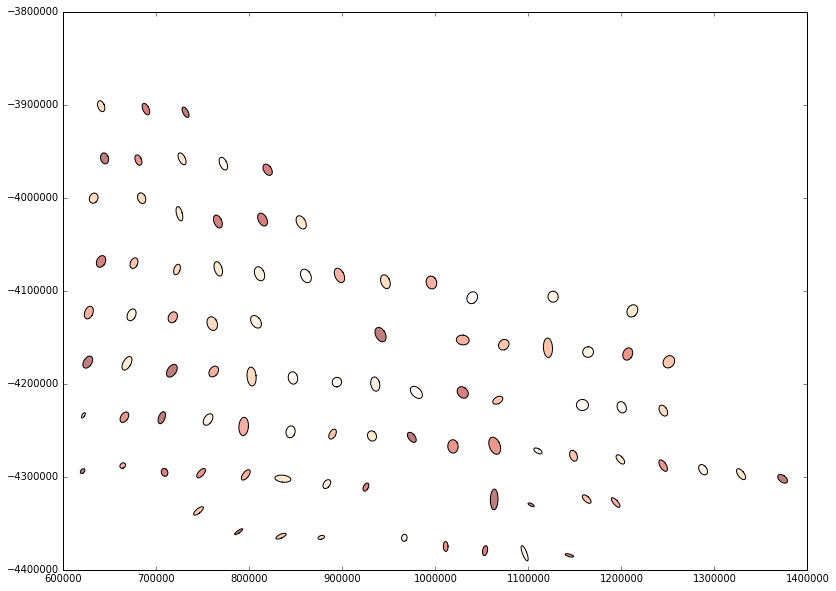

In [93]:

#http://spatialreference.org/ref/epsg/3112/  GA LCC

shpfile=r'/e/Data/MT_Datasets/ReProjected/pt341.22s_3112.geojson'   #pt_utm28354.shp'
shpf=gpd.GeoDataFrame.from_file(shpfile)

#shpf['phi_max'].plot(marker='*', markersize=14)

shpf.plot(cmap='OrRd', scheme='quantiles');  #(marker='o', color='red', markersize=5)
print shpf.shape


# Mapping with Folium

In [94]:
# conda install folium

import folium

mapa = folium.Map([-30.0, 149.0], zoom_start=4,   tiles='cartodbpositron')


In [95]:
myshpf = myshpf.set_geometry('geometry')
myshp2json=myshpf.geometry.to_json()

points =folium.features.GeoJson(myshp2json)
mapa.add_children(points)

In [96]:
geoj2=shpf.to_crs(epsg=4326).to_json()

points2 =folium.features.GeoJson(geoj2)
mapa.add_children(points2)

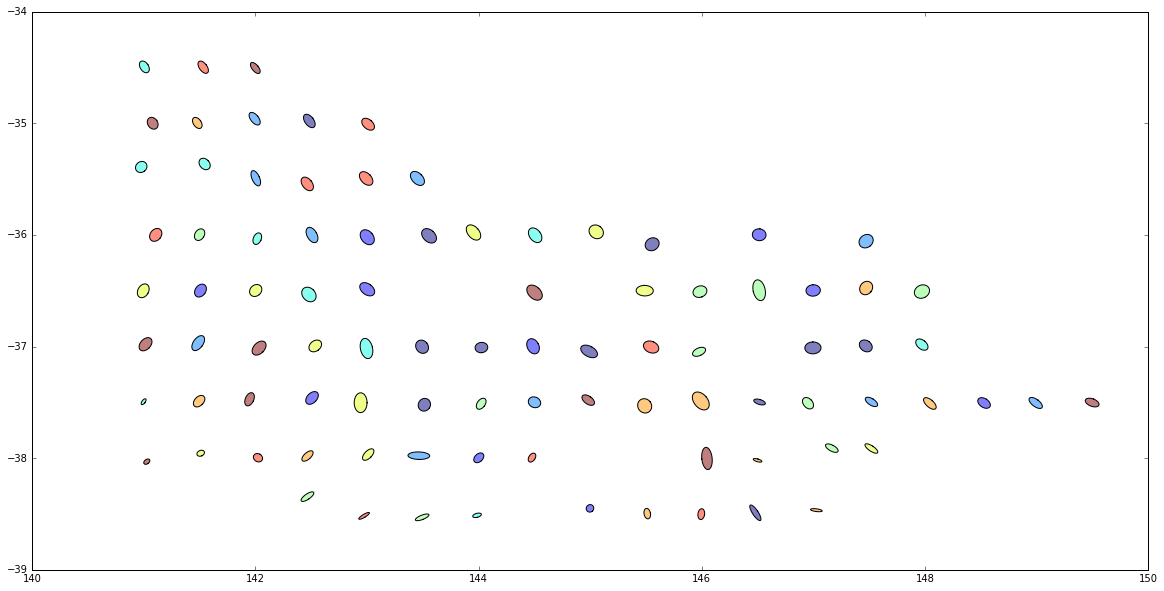

In [97]:
shpf3= shpf.to_crs({'init': 'epsg:4326'})
shpf3.plot()


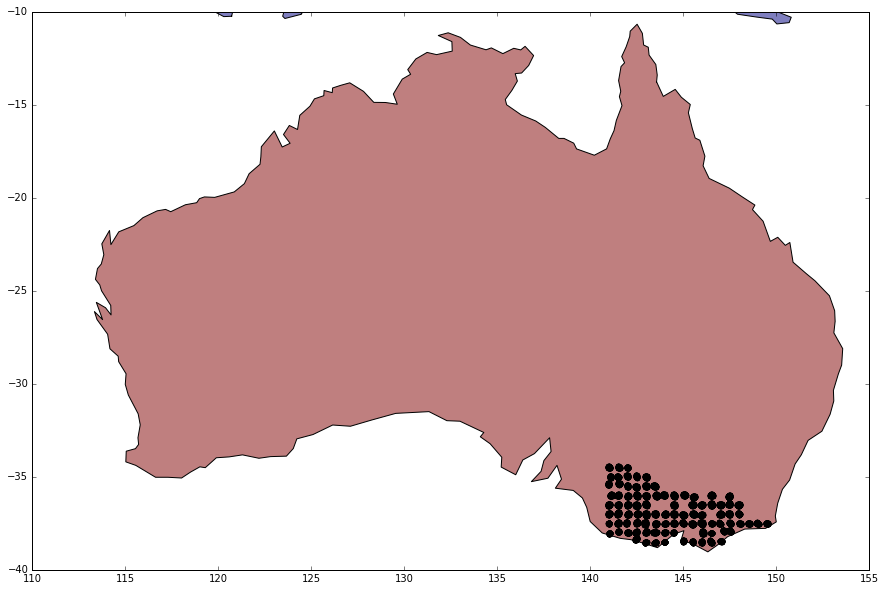

In [98]:
myax=world.plot(alpha=0.5)
#myax.set_xlim([149,150])
myax.set_xlim([110,155])
myax.set_ylim([-40,-10])
shpf3.plot(ax=myax, figsize=(10, 6),  marker='o', color='blue', markersize=5);

# Join/Concat shape files

In [24]:
# In case need to join a few similar shape files to view and analyze
def concat_join(shapefile_list):
    
    gdf_list=[]
    for shpfile in shapefile_list:
        print ("Processing shape file: %s",shpfile)

        shp_gpd=gpd.GeoDataFrame.from_file(shpfile)
        gdf_list.append(shp_gpd)

        print(shp_gpd.shape, shp_gpd.columns)
        print("Projection: ", shp_gpd.crs)

    # ideally, the shape files are of the same structure, then they can be joined well.
    rdf = gpd.GeoDataFrame( pd.concat( shp_list[:5], ignore_index=True) )
    # if shape files have different columns, the concat will produce a many more columns gpd!!!!!

    print(rdf.shape, rdf.columns)

    print(rdf.head())
            
    return rdf


# testing sum_shape= concat_join(shapefile_list)
#rdf.plot()